# 1

In [59]:
import numpy as np
from varname import nameof

# adapted from stack overflow
def bmatrix(a, var_name, exercise=1):
    """Stores in a file a LaTeX bmatrix from a numpy array."""
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join([f"{float(x):.6g}" for x in l.split()]) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    with open(f"./aux-matrices/ex-{exercise}/{var_name}.tex", 'w+') as f:
      f.write('\n'.join(rv))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calc_z(x, w, b):
  return w @ x + b

def calc_d_e_w(delta, x):
  return delta @ x.T

def calc_d_e_b(delta):
  return delta * np.ones((1, delta.shape[1]))

def update_stuff(stuff, learning_rate, gradient):
  return stuff - learning_rate * gradient

In [60]:
LEARNING_RATE = 1

x_t = np.array([1, 1, 0, 0, 0])
z_t = np.array([1, 0])

bmatrix(x_t, nameof(x_t))
bmatrix(z_t, nameof(z_t))

x = x_t.reshape(5, 1)
z = z_t.reshape(2, 1)

bmatrix(x, nameof(x))
bmatrix(z, nameof(z))

In [61]:
[w_1, w_2] = [0.1 * ones for ones in [np.ones((3, 5)), np.ones((2, 3))]]
[b_1, b_2] = [np.zeros((3, 1)), np.zeros((2, 1))]

bmatrix(w_1, nameof(w_1))
bmatrix(w_2, nameof(w_2))
bmatrix(b_1, nameof(b_1))
bmatrix(b_2, nameof(b_2))

In [62]:
z_1 = calc_z(x, w_1, b_1)
x_1 = sigmoid(z_1)

bmatrix(z_1, nameof(z_1))
bmatrix(x_1, nameof(x_1))

z_2 = calc_z(x_1, w_2, b_2)
x_2 = sigmoid(z_2)

bmatrix(z_2, nameof(z_2))
bmatrix(x_2, nameof(x_2))

In [63]:
delta_2 = (x_2 - z) * sigmoid(z_2) * (1 - sigmoid(z_2))
delta_1 = w_2.T @ delta_2 * sigmoid(z_1) * (1 - sigmoid(z_1))

bmatrix(delta_2, nameof(delta_2))
bmatrix(delta_1, nameof(delta_1))

In [64]:
d_e_w1 = calc_d_e_w(delta_1, x)
d_e_w2 = calc_d_e_w(delta_2, x_1)
d_e_b1 = calc_d_e_b(delta_1)
d_e_b2 = calc_d_e_b(delta_2)

bmatrix(d_e_w1, nameof(d_e_w1))
bmatrix(d_e_w2, nameof(d_e_w2))
bmatrix(d_e_b1, nameof(d_e_b1))
bmatrix(d_e_b2, nameof(d_e_b2))

In [65]:
w1_new = update_stuff(w_1, LEARNING_RATE, d_e_w1)
w2_new = update_stuff(w_2, LEARNING_RATE, d_e_w2)
b1_new = update_stuff(b_1, LEARNING_RATE, d_e_b1)
b2_new = update_stuff(b_2, LEARNING_RATE, d_e_b2)

bmatrix(w1_new, nameof(w1_new))
bmatrix(w2_new, nameof(w2_new))
bmatrix(b1_new, nameof(b1_new))
bmatrix(b2_new, nameof(b2_new))

In [66]:
x_new = np.array([1, 0, 0, 0, 1])

bmatrix(x_new, nameof(x_new))

x_new = x_new.reshape(5, 1)

In [67]:
z_1_new = calc_z(x_new, w1_new, b1_new)
x_1_new = sigmoid(z_1_new)

z_2_new = calc_z(x_1_new, w2_new, b2_new)
x_2_new = sigmoid(z_2_new)

bmatrix(z_1_new, nameof(z_1_new))
bmatrix(x_1_new, nameof(x_1_new))
bmatrix(z_2_new, nameof(z_2_new))
bmatrix(x_2_new, nameof(x_2_new))

# 2)

In [68]:
LEARNING_RATE = 0.1

x_t = np.array([1, 0, 1, 0])
z_t = np.array([0, 1, 0])

bmatrix(x_t, nameof(x_t), exercise=2)
bmatrix(z_t, nameof(z_t), exercise=2)

x = x_t.reshape(4, 1)
z = z_t.reshape(3, 1)

In [69]:
x2_t = np.array([0, 0, 10, 0])
z2_t = np.array([0, 0, 1])

bmatrix(x2_t, nameof(x2_t), exercise=2)
bmatrix(z2_t, nameof(z2_t), exercise=2)

x2 = x2_t.reshape(4, 1)
z2 = z2_t.reshape(3, 1)

In [70]:
[w_1, w_2, w_3] = [0.1 * ones for ones in [np.ones((4, 4)), np.ones((3, 4)), np.ones((3, 3))]]
[b_1, b_2, b_3] = [np.zeros((4, 1)), np.zeros((3, 1)), np.zeros((3, 1))]

bmatrix(w_1, nameof(w_1), exercise=2)
bmatrix(w_2, nameof(w_2), exercise=2)
bmatrix(w_3, nameof(w_3), exercise=2)
bmatrix(b_1, nameof(b_1), exercise=2)
bmatrix(b_2, nameof(b_2), exercise=2)
bmatrix(b_3, nameof(b_3), exercise=2)

In [71]:
x_0_t = np.hstack((x, x2)).T

bmatrix(x_0_t, nameof(x_0_t), exercise=2)

print(x_0_t)

x_0 = x_0_t.T

bmatrix(x_0, nameof(x_0), exercise=2)

[[ 1  0  1  0]
 [ 0  0 10  0]]


In [72]:
z_0_t = np.hstack((z, z2)).T

bmatrix(z_0_t, nameof(z_0_t), exercise=2)

z_0 = z_0_t.T

bmatrix(z_0, nameof(z_0), exercise=2)

In [73]:
z_1 = calc_z(x_0, w_1, b_1)
x_1 = np.tanh(z_1)

bmatrix(z_1, nameof(z_1), exercise=2)
bmatrix(x_1, nameof(x_1), exercise=2)

z_2 = calc_z(x_1, w_2, b_2)
x_2 = np.tanh(z_2)

bmatrix(z_2, nameof(z_2), exercise=2)
bmatrix(x_2, nameof(x_2), exercise=2)

z_3 = calc_z(x_2, w_3, b_3)
x_3 = np.tanh(z_3)

bmatrix(z_3, nameof(z_3), exercise=2)
bmatrix(x_3, nameof(x_3), exercise=2)

In [74]:
delta_3 = (x_3 - z_0) * (1 - np.tanh(z_3) ** 2)
delta_2 = w_3.T @ delta_3 * (1 - np.tanh(z_2) ** 2)
delta_1 = w_2.T @ delta_2 * (1 - np.tanh(z_1) ** 2)

bmatrix(delta_3, nameof(delta_3), exercise=2)
bmatrix(delta_2, nameof(delta_2), exercise=2)
bmatrix(delta_1, nameof(delta_1), exercise=2)

In [75]:
d_e_w3 = calc_d_e_w(delta_3, x_2)
d_e_w2 = calc_d_e_w(delta_2, x_1)
d_e_w1 = calc_d_e_w(delta_1, x_0)

one_matrix = np.ones((2, 1))

d_e_b3 = calc_d_e_b(delta_3)
d_e_b2 = calc_d_e_b(delta_2)
d_e_b1 = calc_d_e_b(delta_1)

bmatrix(d_e_w3, nameof(d_e_w3), exercise=2)
bmatrix(d_e_w2, nameof(d_e_w2), exercise=2)
bmatrix(d_e_w1, nameof(d_e_w1), exercise=2)
bmatrix(d_e_b3, nameof(d_e_b3), exercise=2)
bmatrix(d_e_b2, nameof(d_e_b2), exercise=2)
bmatrix(d_e_b1, nameof(d_e_b1), exercise=2)
bmatrix(one_matrix, nameof(one_matrix), exercise=2)

In [76]:
w3_new = update_stuff(w_3, LEARNING_RATE, d_e_w3)
w2_new = update_stuff(w_2, LEARNING_RATE, d_e_w2)
w1_new = update_stuff(w_1, LEARNING_RATE, d_e_w1)

b3_new = update_stuff(b_3, LEARNING_RATE, d_e_b3)
b2_new = update_stuff(b_2, LEARNING_RATE, d_e_b2)
b1_new = update_stuff(b_1, LEARNING_RATE, d_e_b1)

bmatrix(w3_new, nameof(w3_new), exercise=2)
bmatrix(w2_new, nameof(w2_new), exercise=2)
bmatrix(w1_new, nameof(w1_new), exercise=2)
bmatrix(b3_new, nameof(b3_new), exercise=2)
bmatrix(b2_new, nameof(b2_new), exercise=2)
bmatrix(b1_new, nameof(b1_new), exercise=2)

# 3)

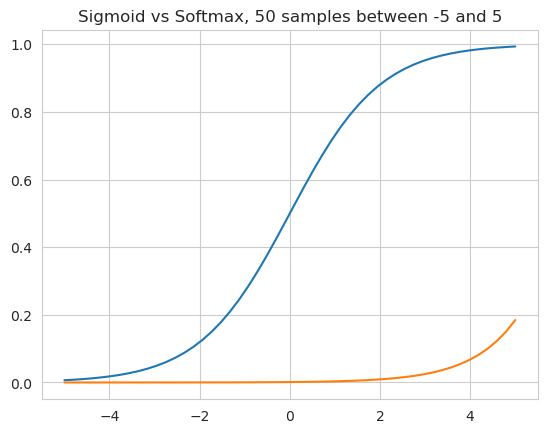

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

# Plot, side by side, both a sigmoid and a softmax function's output

x = np.linspace(-5, 5, 50)
y = sigmoid(x)
z = softmax(x)

plt.plot(x, y, label="Sigmoid")
plt.plot(x, z, label="Softmax")
plt.title("Sigmoid vs Softmax, 50 samples between -5 and 5")
plt.savefig("assets/sigmoid-softmax.png")

In [78]:
x_3 = softmax(z_3)
bmatrix(x_3, nameof(x_3), exercise=3)

In [79]:
delta_3 = x_3 - z_0

# both delta_2 and 1 are actually squared zero matrices, but since python is amazing
# the results are actually things^-18 and such, so yeah
zeros_2_2 = np.zeros((2, 2))
delta_2 = zeros_2_2
delta_1 = zeros_2_2

bmatrix(delta_3, nameof(delta_3), exercise=3)
bmatrix(delta_2, nameof(delta_2), exercise=3)
bmatrix(delta_1, nameof(delta_1), exercise=3)
bmatrix(zeros_2_2, nameof(zeros_2_2), exercise=3)

In [81]:
d_e_w3 = calc_d_e_w(delta_3, x_2)
d_e_b3 = calc_d_e_b(delta_3)

one_matrix = np.ones((2, 1))

bmatrix(d_e_w3, nameof(d_e_w3), exercise=3)
bmatrix(d_e_b3, nameof(d_e_b3), exercise=3)
bmatrix(one_matrix, nameof(one_matrix), exercise=3)

In [82]:
w3_new = update_stuff(w_3, LEARNING_RATE, d_e_w3)
b3_new = update_stuff(b_3, LEARNING_RATE, d_e_b3)

bmatrix(w3_new, nameof(w3_new), exercise=3)
bmatrix(b3_new, nameof(b3_new), exercise=3)